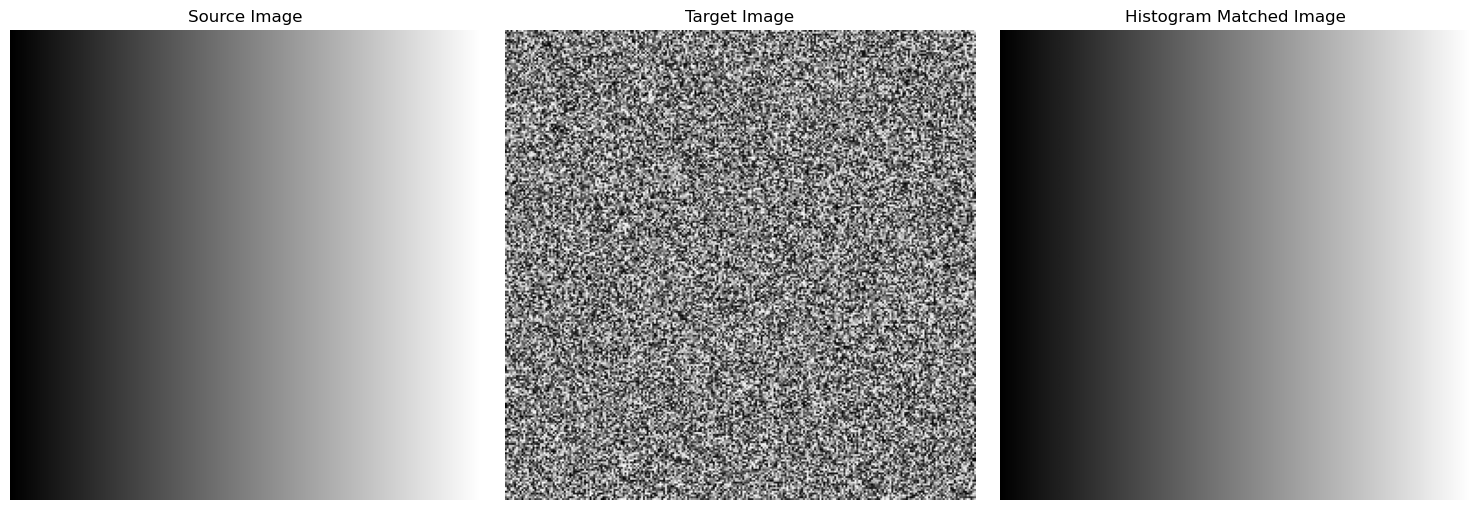

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_pdf_and_cdf(img):
    """Calculate the PDF and CDF of an image."""
    hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))
    pdf = hist / np.sum(hist)
    cdf = np.cumsum(pdf)
    return pdf, cdf

def build_mapping(cdf_source, cdf_target):
    """Create a mapping from source to target intensities."""
    mapping = np.zeros(256, dtype=np.uint8)
    for src_intensity in range(256):
        diff = np.abs(cdf_source[src_intensity] - cdf_target)
        mapping[src_intensity] = np.argmin(diff)
    return mapping

def histogram_match(source_img, target_img):
    """Apply histogram matching from scratch."""
    _, cdf_source = calculate_pdf_and_cdf(source_img)
    _, cdf_target = calculate_pdf_and_cdf(target_img)

    mapping = build_mapping(cdf_source, cdf_target)
    matched_flat = mapping[source_img.flatten()]
    matched_img = matched_flat.reshape(source_img.shape)
    return matched_img

def plot_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


def generate_gradient_image(width=256, height=256):
    """Generate a synthetic gradient image (source image)."""
    gradient = np.tile(np.arange(width, dtype=np.uint8), (height, 1))
    return gradient

source_image = generate_gradient_image()
cv2.imwrite('source_image.jpg', source_image)


def generate_random_contrast_image(width=256, height=256):
    """Generate a synthetic target image with random intensities."""
    rng = np.random.default_rng(seed=42)
    img = rng.integers(low=0, high=256, size=(height, width), dtype=np.uint8)
    return img

target_image = generate_random_contrast_image()
cv2.imwrite('target_image.jpg', target_image)


matched_image = histogram_match(source_image, target_image)
cv2.imwrite('matched_image.jpg', matched_image)

# Plot results
plot_images([source_image, target_image, matched_image],
            ["Source Image", "Target Image", "Histogram Matched Image"])
